In [1]:
import pandas as pd
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
data = pd.read_csv(r"C:\Users\sneha.priya\OneDrive - WiseTech Global Pty Ltd\Desktop\DS\VDT model\DS Interview Assignment\DS Interview Assignment\Data for Assignment 1\csv_files\model_data.csv")

In [3]:
data.columns

Index(['Unnamed: 0', 'HAZMAT', 'IMPORT_DWELL', 'IMPORT_DWELL_SCALED',
       'IS_WEEKEND', 'Vessel_size_category', 'VTT', 'AVERAGE_BERTH_TIME',
       'Total_Arrival_in_Window', 'Terminals_in_Port', 'UNIQUE_VESSELS_RATIO',
       'ARRIVALS_RATIO'],
      dtype='object')

In [4]:
data = data[['HAZMAT', 'IMPORT_DWELL_SCALED',
       'IS_WEEKEND', 'Vessel_size_category', 'VTT', 'AVERAGE_BERTH_TIME',
       'Total_Arrival_in_Window', 'Terminals_in_Port', 'UNIQUE_VESSELS_RATIO',
       'ARRIVALS_RATIO']]

In [5]:
data.head()

,HAZMAT,IMPORT_DWELL_SCALED,IS_WEEKEND,Vessel_size_category,VTT,AVERAGE_BERTH_TIME,Total_Arrival_in_Window,Terminals_in_Port,UNIQUE_VESSELS_RATIO,ARRIVALS_RATIO
0,0,5.581219,0,0,45.8,60.251366,640,2,0.619048,0.803279
1,0,7.200192,0,0,45.8,60.251366,640,2,0.619048,0.803279
2,0,10.409747,0,0,45.8,60.251366,640,2,0.619048,0.803279
3,0,5.317675,0,0,45.8,60.251366,640,2,0.619048,0.803279
4,0,5.368350,0,0,45.8,60.251366,640,2,0.619048,0.803279


In [6]:
hazmat_groups = data.groupby('HAZMAT')['IMPORT_DWELL_SCALED'].apply(list)
anova_result_hazmat = f_oneway(*hazmat_groups)

C:\Users\sneha.priya\AppData\Local\Temp\ipykernel_46528\2129239481.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HAZMAT', y='IMPORT_DWELL_SCALED', data=data, palette='Set2')


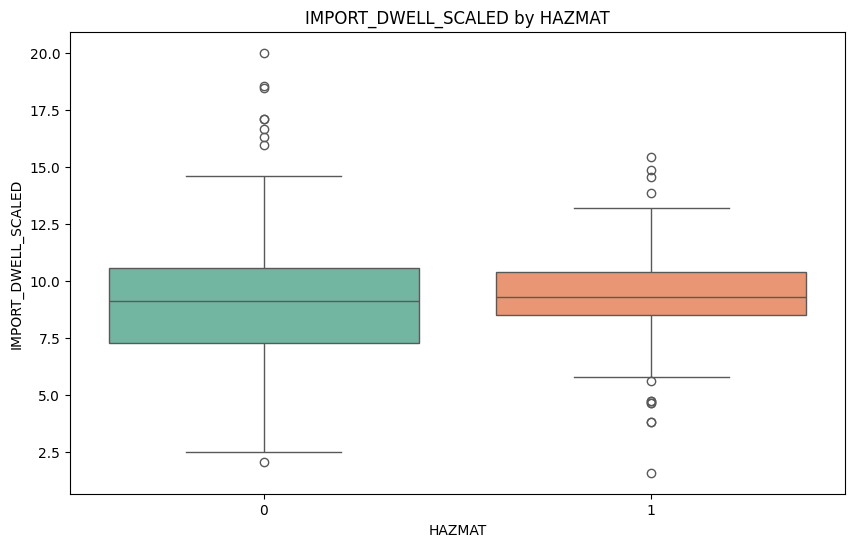

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='HAZMAT', y='IMPORT_DWELL_SCALED', data=data, palette='Set2')
plt.title('IMPORT_DWELL_SCALED by HAZMAT')
plt.xlabel('HAZMAT')
plt.ylabel('IMPORT_DWELL_SCALED')
plt.show()

In [8]:
anova_result_hazmat

F_onewayResult(statistic=3.203159759984979, pvalue=0.07380864362125385)

C:\Users\sneha.priya\AppData\Local\Temp\ipykernel_46528\3820318922.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='IS_WEEKEND', y='IMPORT_DWELL_SCALED', data=data, palette='Set2')


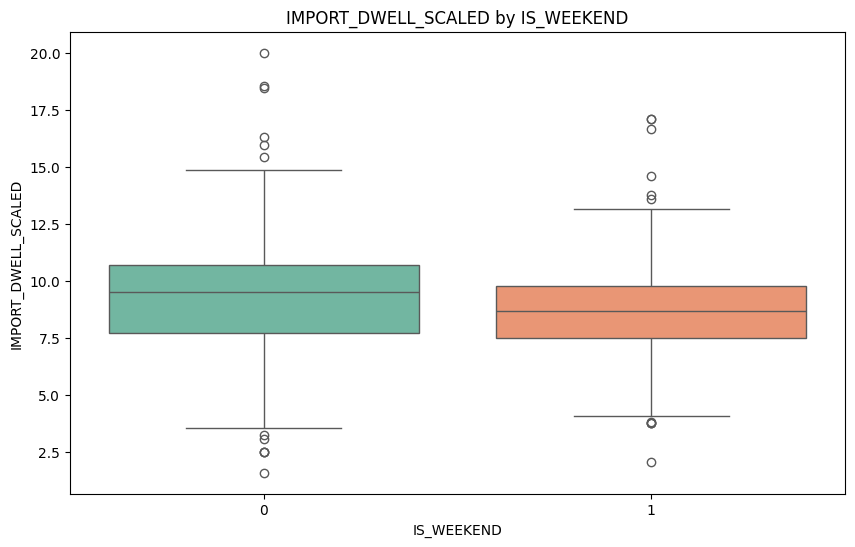

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='IS_WEEKEND', y='IMPORT_DWELL_SCALED', data=data, palette='Set2')
plt.title('IMPORT_DWELL_SCALED by IS_WEEKEND')
plt.xlabel('IS_WEEKEND')
plt.ylabel('IMPORT_DWELL_SCALED')
plt.show()

In [10]:
weekend_groups = data.groupby('IS_WEEKEND')['IMPORT_DWELL_SCALED'].apply(list)
anova_result_weekend = f_oneway(*weekend_groups)

In [11]:
anova_result_weekend

F_onewayResult(statistic=9.638670531887131, pvalue=0.0019606123216133206)

C:\Users\sneha.priya\AppData\Local\Temp\ipykernel_46528\2789033520.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Vessel_size_category', y='IMPORT_DWELL_SCALED', data=data, palette='Set2')


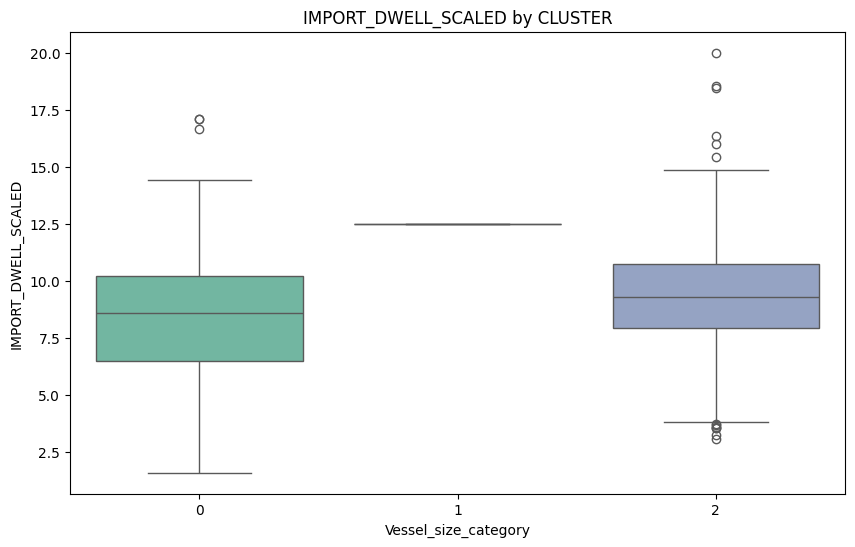

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Vessel_size_category', y='IMPORT_DWELL_SCALED', data=data, palette='Set2')
plt.title('IMPORT_DWELL_SCALED by CLUSTER')
plt.xlabel('Vessel_size_category')
plt.ylabel('IMPORT_DWELL_SCALED')
plt.show()

In [13]:
data[data['Vessel_size_category']==1]

,HAZMAT,IMPORT_DWELL_SCALED,IS_WEEKEND,Vessel_size_category,VTT,AVERAGE_BERTH_TIME,Total_Arrival_in_Window,Terminals_in_Port,UNIQUE_VESSELS_RATIO,ARRIVALS_RATIO
969,0,12.485287,0,1,85.633333,85.633333,2,1,1.0,1.0


In [14]:
# Exclude the CLUSTER category with only one observation from the analysis
data = data[data['Vessel_size_category'] != 1]

In [15]:
data['Vessel_size_category'].value_counts()

2    705
0    264
Name: Vessel_size_category, dtype: int64

C:\Users\sneha.priya\AppData\Local\Temp\ipykernel_46528\984120107.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Vessel_size_category', y='IMPORT_DWELL_SCALED', data=data, palette='Set2')


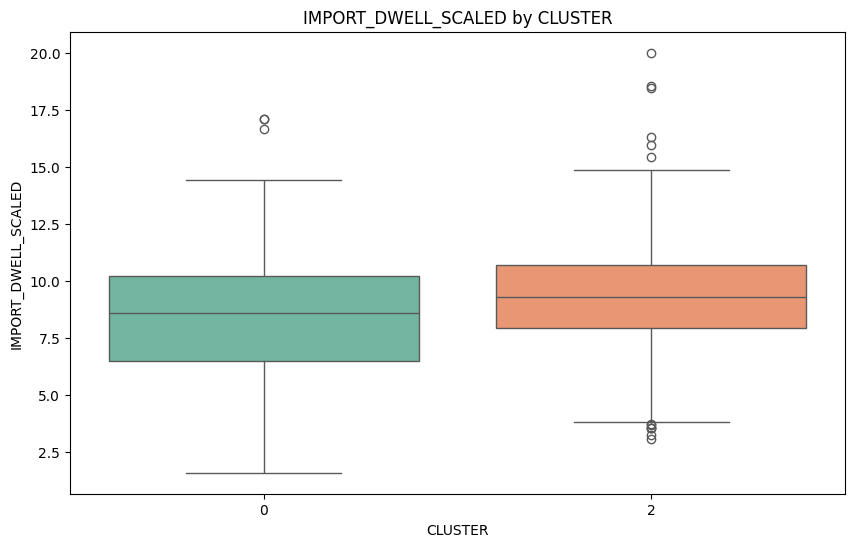

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Vessel_size_category', y='IMPORT_DWELL_SCALED', data=data, palette='Set2')
plt.title('IMPORT_DWELL_SCALED by CLUSTER')
plt.xlabel('CLUSTER')
plt.ylabel('IMPORT_DWELL_SCALED')
plt.show()

In [17]:
clusters_groups = data.groupby('Vessel_size_category')['IMPORT_DWELL_SCALED'].apply(list)
anova_result_clusters = f_oneway(*clusters_groups)

In [18]:
anova_result_clusters

F_onewayResult(statistic=29.11601317263912, pvalue=8.575702936013185e-08)

In [19]:
# 'Arrival_in_Window', 'Terminals_in_Port',
#        'Vessels_per_Terminal_in_Window', 'VTT'],

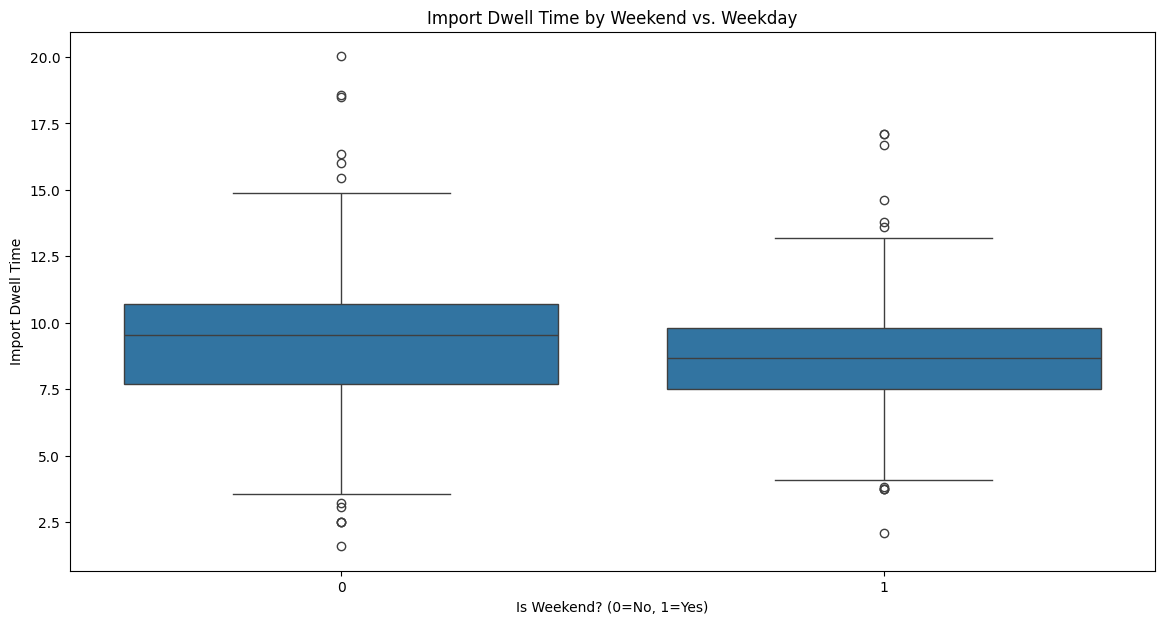

In [20]:
# Create boxplot for 'IS_WEEKEND' vs 'IMPORT_DWELL'
plt.figure(figsize=(14, 7))
sns.boxplot(x='IS_WEEKEND', y='IMPORT_DWELL_SCALED', data=data)
plt.title('Import Dwell Time by Weekend vs. Weekday')
plt.xlabel('Is Weekend? (0=No, 1=Yes)')
plt.ylabel('Import Dwell Time')
plt.show()

In [21]:
weekend_groups = data.groupby('IS_WEEKEND')['IMPORT_DWELL_SCALED'].apply(list)
anova_result_weekend = f_oneway(*weekend_groups)

In [22]:
anova_result_weekend

F_onewayResult(statistic=9.484522377369048, pvalue=0.0021306467950904903)

In [23]:
correlation_matrix = data[['IMPORT_DWELL_SCALED','AVERAGE_BERTH_TIME', 'Total_Arrival_in_Window','Terminals_in_Port',
                       'UNIQUE_VESSELS_RATIO', 'ARRIVALS_RATIO','VTT']].corr()
correlation_matrix

,IMPORT_DWELL_SCALED,AVERAGE_BERTH_TIME,Total_Arrival_in_Window,Terminals_in_Port,UNIQUE_VESSELS_RATIO,ARRIVALS_RATIO,VTT
IMPORT_DWELL_SCALED,1.000000,0.214844,0.219438,0.271180,-0.252716,-0.265809,0.289990
AVERAGE_BERTH_TIME,0.214844,1.000000,-0.197543,0.358046,-0.443568,-0.299584,0.848338
Total_Arrival_in_Window,0.219438,-0.197543,1.000000,0.648763,-0.291952,-0.381464,-0.167583
Terminals_in_Port,0.271180,0.358046,0.648763,1.000000,-0.671209,-0.593926,0.303744
UNIQUE_VESSELS_RATIO,-0.252716,-0.443568,-0.291952,-0.671209,1.000000,0.931826,-0.414901
ARRIVALS_RATIO,-0.265809,-0.299584,-0.381464,-0.593926,0.931826,1.000000,-0.362102
VTT,0.289990,0.848338,-0.167583,0.303744,-0.414901,-0.362102,1.000000


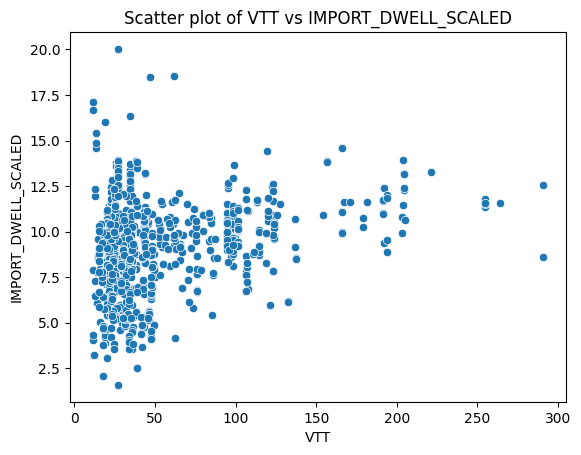

In [24]:
sns.scatterplot(x=data['VTT'], y=data['IMPORT_DWELL_SCALED'])
plt.xlabel('VTT')
plt.ylabel('IMPORT_DWELL_SCALED')
plt.title('Scatter plot of VTT vs IMPORT_DWELL_SCALED')
plt.show()